<h1><center>D209: Data Mining I</center></h1>
<br>
<center>Task 1: KNN</center>
<br>
<center>Michelle Nelson</center>
<br>
<center>Department of Information Technology, Western Governor's University</center>
<br>
<center>Dr. Eric Straw</center>
<br>
<center>February 20, 2024</center>
<br>
<br>
<br>
<br>

## A1. Research Question
KNN can be used to try and predict a categorical response variable just as logistic regression can be used to do so. Because my logistic regression model was so poor at predicting readmission in my paper for D208, I would again like to ask the research question, "What factors influence whether or not a patient is readmitted?" This time, however, I will be using a KNN model to see if I can better predict readmission than my previous attempt at doing so.

A high readmission rate is unfavorable for both the patient and the hospital. Lower readmission rates improve patient outcomes and satisfaction and high readmission rates strain physicians and waste time and resources (Regis College, 2022). Thus, it is generally advisable that a hospital do what it can to reduce its readmission rate. Identification of significant contributing factors that increase readmission can enable a hospital to be more proactive instead of reactive, which hopefully will allow the hospital to lower its readmission rate or at least put a plan in place to do so.

## A2. Analysis Objectives and Goals

As aforementioned, my goal for this analysis is to create a model that is better able to predict readmission than my previous attempt using logistic regression. As such, I will be using a new type of model, K-Nearest Neighbors, to attempt to do so. 

Speaking more broadly, however, the goal is to attempt to help the hospital to which this data belongs reduce their readmission rate by first identifying the factors that contribute to a patient's readmission. Then, the hospital can use such information to come up with a proactive plan. Long term, the hospital could expect to see benefits such as improved efficiency and reduced costs, as mentioned above, which might also be communicated as a goal of this analysis to a board of executives. 

## B1. Justification of Classification Method

A KNN model graphs training datapoints with their features and labels. You can visualize this sort of like a scatterplot, where each axis represents a feature and the dots graphed on these axes are colored according to their labels. The below image, from a Towards Data Science article, nicely illustrates this concept (Raj, 2022).

![KNN Graph](https://miro.medium.com/v2/resize:fit:828/format:webp/1*0BB6XtINbZb5DTQq2MkkGQ.png) 

When you feed a KNN model a new datapoint, this datapoint is also mapped. Then, the model checks the "k" nearest dots on this graph (k is a number you specify) and tallies the labels of each. Distance is measured as Euclidean distance, otherwise known as the cartesian distance. This is the length of a straight line between two objects. KNN decides on the label of the new point with a majority vote. If the tally of labels, for example, was 5 for red and 3 for green (this means k was equal to 8,) then the new datapoint would be predicted to be red.

K can be chosen arbitrarily or tuned via a variety of methods known collectively as hyperparameter tuning. For this paper, I will not perform any hyperparameter tuning.

## B2. KNN Model Assumptions

The most important assumption a KNN model operates on is that nearby datapoints, as plotted on a graph, are similar to each other. KNN surveys the datapoints around an unknown datapoint with the shortest distances to the unknown datapoint. If this assumption is violated, KNN will not be effective in predicting the label the unknown datapoint should have because the model is dependent on the idea that the surrounding, known datapoints are informative about the unknown one.

## B3. Benefits of Python Packages

For this project, I will be using Python and the following packages:

* Pandas
    * Pandas is useful because it allows us a framework for working with the data. Without it, using only numpy arrays would be rather clunky. Pandas allows the data to resemble a spreadsheet.
* NumPy
    * In this case, I will be using numpy for certain mathematical operations like summing, squaring, or square rooting.
* Seaborn
    * This package is handy in combination with matplotlib.pyplot because it expands the kinds of graphs we can use to plot the data. With seaborn, I can create scatterplots, plots with a line of best fit, and so on.
* Matplotlib.pyplot
    * I will primarily be using this to create graphs such as the ROC curve.
* Sklearn
    * sklearn.neighbors: I will be using KNeighborsClassifier from this package, which is the classifier algorithm I will be using to run analysis on this data.
    * sklearn.model_selection: I will use train_test_split from this package, which I will use to easily divide the dataset into train and test datasets.
    * sklearn.metrics: I will use this package's roc_curve and roc_auc_score to plot the ROC curve and compute the AUC score for the KNN model, respectively. I will also use confusion_matrix for more insight as to the model's performance.
    * sklearn.preprocessing: I will use this package's StandardScaler to scale the data prior to feeding it into the KNN model.
    
    

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#load csv into pandas dataframe. The CSV's first column is an index, so we let pandas know that too.
df=pd.read_csv('C:/Users/essay/Documents/D209 PA Dataset/medical_clean.csv', index_col = 0)

#visually inspect dataframe's datatypes and size to ensure it loaded properly.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to ensure data loaded as expected and do initial visual exploration
pd.set_option("display.max_columns", None)
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.691180,12742.589910,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.627161,16815.513600,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.499039,6930.572138,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.402860,8363.187290,3,3,2,3,3,3,4,2


## C1. Data Preparation Goals

I will be performing several data preparation steps so that the data is ready for KNN classification, many of which are directly taken from my D208 paper. However, the most important step I feel I should highlight is creating dummy variables using one-hot encoding. This process converts a categorical variable column's values from their labels like "male" and "female" to integer representations that a KNN model can understand, with one column for each category. 

For example, let's examine Gender. If a 1 appears in the dummy column for male, we know the patient was male. If a 1 appears in the dummy column for female, we know the patient was female. If 0 appears in both columns, we know the patient was non-binary, but for KNN, we should actually keep the dummy non-binary column, which would hold a 1 if the patient is non-binary. For linear and logistic regression, it is common practice to drop one of these three columns because zeros in the other two tell you that the third would hold a one. This is because for linear and logistic regression, keeping a dummy column for each category present in the original column would cause multicollinearity issues, which linear and logistic regression are both sensitive to. KNN does not suffer from this problem because it does not make linear combinations of the features (Categorical Predictors: How Many Dummies to Use in Regression Vs. K-nearest Neighbors, n.d.). Thus, when I create dummy variables for my categorical columns, I will keep a dummy column for each category in the column and refrain from dropping one.

## C2. Variable Selection

For my analysis, I will not use columns whose data is categorical with a high cardinality of choices. These columns would require one-hot encoding, which, when performed on columns such as these, greatly expands the dataset columnwise. For example, the column "Job" has 639 different choices for occupation (see the code for obtaining this number below.) Performing one-hot encoding on this column would result in the addition of 639 new columns to the dataframe and the removal of the original column. Expanding the dataframe to such a size would not only be cumbersome, but it also increases the risk that my laptop would be set aflame by the sheer processing power required for a KNN model running on that many features. For my D208 paper, I excluded high cardinality categorical variables for the same reason.

In [3]:
print(len(pd.unique(df.Job)))

639


Other variables will be excluded simply because I want to do a comparison of this KNN model and the logistic regression I did in my previous paper. Thus, I will limit myself to the same variable set I used for multiple logistic regression. The variables I will use are as follows:

* Age: Numeric
* Gender: Categorical
* ReAdmis: Categorical
* HighBlood: Categorical
* Initial_admin: Categorical
* Stroke: Categorical
* Diabetes: Categorical
* Complication_risk: Categorical
* BackPain: Categorical
* Anxiety: Categorical
* Overweight: Categorical
* Services: Categorical

## C3. Data Preparation

Since the dataframe is stored as a CSV, there are a number of errors that will need to be fixed that are more in the data cleaning realm. The CSV format has caused the Zip Code column to lose leading zeros that are part of the zip code. Those will be replaced. There are also a number of columns stored in the incorrect datatype. These will be converted, beginning with the Zip Code column, which is erroneously stored as an integer. Many of the remaining columns are string objects that would better be stored as categories. Below you will find the code used to do these two things.

In [4]:
#Clean datatypes up using code from D206 PA. 
#[In-Text Citation: (Nelson, 2023).]

# Convert Zip to string from integer.
df['Zip'] = df['Zip'].astype('str')
# Add leading zeros using zfill()
df['Zip'] = df['Zip'].str.zfill(5)
# Identify columns that can be converted all at once to category datatype using for loop.
category_cols = df[['Area', 'Marital', 'Initial_admin', 'Complication_risk', 'Services', 'ReAdmis',
                         'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                         'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]
# Will do Item# columns later since they require an order. Timezone needs a dict written, will do that later too.
for col in category_cols:
    df[col] = df[col].astype('category')
# Convert gender to category datatype.
df['Gender'] = df['Gender'].astype('category')
# Convert Overweight to category datatype.
df['Overweight'] = df['Overweight'].astype('category')
# Convert Anxiety to category datatype.
df['Anxiety'] = df['Anxiety'].astype('category')
# Convert Job to category datatype.
df['Job'] = df['Job'].astype('category')

# Create ordered categories for Item# variables. 8 is "least important" and 1 is "most important"
survey_scores = CategoricalDtype(categories=['8', '7', '6', '5', '4', '3', '2', '1'], ordered=True)
# Identify columns that need to become ordered categorical
ord_cat_cols = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]
# Create for loop to convert columns above to string (issues if not string first,) then ordered categorical datatype.
for col in ord_cat_cols:
    df[col] = df[col].astype('str')
    df[col] = df[col].astype(survey_scores)
# convert Initial_days to an integer.
df['Initial_days'] = df['Initial_days'].astype('int64')

While not necessary for this paper, I will also reduce the timezone column's cardinality from its many, detailed choices to just the commonly recognized timezones. This will then be converted to a category datatype as well.

In [5]:
# Write dictionary for option reduction for Timezone column
mapping_timezone = {'America/Puerto_Rico' : 'Atlantic',
          'America/New_York' : 'Eastern',
          'America/Detroit' : 'Eastern',
          'America/Indiana/Indianapolis' : 'Eastern',
          'America/Indiana/Vevay' : 'Eastern',
          'America/Indiana/Vincennes' : 'Eastern',
          'America/Kentucky/Louisville' : 'Eastern',
          'America/Toronto' : 'Eastern',
          'America/Indiana/Marengo' : 'Eastern',
          'America/Indiana/Winamac' : 'Eastern',
          'America/Chicago' : 'Central',
          'America/Menominee' : 'Central',
          'America/Indiana/Knox' : 'Central',
          'America/Indiana/Tell_City' : 'Central',
          'America/North_Dakota/Beulah' : 'Central',
          'America/North_Dakota/New_Salem' : 'Central',
          'America/Denver' : 'Mountain',
          'America/Boise' : 'Mountain',
          'America/Phoenix' : 'Mountain',
          'America/Los_Angeles' : 'Pacific',
          'America/Nome' : 'Alaskan',
          'America/Anchorage' : 'Alaskan',
          'America/Sitka' : 'Alaskan',
          'America/Yakutat' : 'Alaskan',
          'America/Adak' : 'Hawaiian',
          'Pacific/Honolulu' : 'Hawaiian'
          }
# Use dictionary to convert timezone options.
df.TimeZone.replace(mapping_timezone, inplace=True)
# Convert timezone to category datatype.
df['TimeZone'] = df['TimeZone'].astype('category')

Lastly, there are a couple categories that would better be stored with less precision, as money isn't stored with more than two decimal places. I will round these.

In [6]:
# Round TotalCharge to 2 decimal places
df['TotalCharge'] = df.TotalCharge.round(2)
# Round Additional_charges to 2 decimal places
df['Additional_charges'] = df.Additional_charges.round(2)

In [7]:
#Re-inspect dataframe to see if changes took.
df.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  object  
 4   State               10000 non-null  object  
 5   County              10000 non-null  object  
 6   Zip                 10000 non-null  object  
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  TimeZone            10000 non-null  category
 12  Job                 10000 non-null  category
 13  Children            10000 non-null  int64   
 14  Age                 10000 non-null  int64   
 15  Income              10000 non-null  

In [8]:
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,Central,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,Central,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,Central,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,Central,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,Eastern,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1,2113.07,3716.53,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,Central,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5,2636.69,12742.59,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,Eastern,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9,3694.63,16815.51,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,Eastern,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14,3021.50,6930.57,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,Central,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6,2968.40,8363.19,3,3,2,3,3,3,4,2


Now that the data is cleaner (despite being labeled as already cleaned,) let us move on to items that are more in the data preparation realm. The first step is to create dummy variables for all of the categorical columns I intend to use for KNN analysis, since KNN requires numeric representations of categorical variables. For columns with choice cardinality greater than two, I will use get_dummies. I will keep every column generated by get_dummies instead of dropping one of them as I would for logistic and linear regression. For columns with choice cardinality equal to two, I will simply make a boolean mapping dictionary and use that to map yes to 1 and no to 0. These dummy variables will be inserted into a new dataframe made to house solely the variables I am interested in for KNN regression.

In [9]:
# Create dictionary needed to re-map boolean columns.
boolean_map = {"No" : 0, "Yes" : 1}
# Map all boolean variables and convert to int
df["ReAdmis"] = df["ReAdmis"].map(boolean_map)
df["ReAdmis"] = df["ReAdmis"].astype("int64")
df["Soft_drink"] = df["Soft_drink"].map(boolean_map)
df["HighBlood"] = df["HighBlood"].map(boolean_map)
df["HighBlood"] = df["HighBlood"].astype('int64')
df["Stroke"] = df["Stroke"].map(boolean_map)
df["Stroke"] = df["Stroke"].astype('int64')
df["Overweight"] = df["Overweight"].map(boolean_map)
df["Overweight"] = df["Overweight"].astype('int64')
df["Arthritis"] = df["Arthritis"].map(boolean_map)
df["Diabetes"] = df["Diabetes"].map(boolean_map)
df["Diabetes"] = df["Diabetes"].astype('int64')
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(boolean_map)
df["BackPain"] = df["BackPain"].map(boolean_map)
df["BackPain"] = df["BackPain"].astype('int64')
df["Anxiety"] = df["Anxiety"].map(boolean_map)
df["Anxiety"] = df["Anxiety"].astype('int64')
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(boolean_map)
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(boolean_map)
df["Asthma"] = df["Asthma"].map(boolean_map)

# Check that these took.
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,Central,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,Central,Community development worker,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,Central,Chief Executive Officer,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,Central,Early years teacher,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,Eastern,Health promotion specialist,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1,2113.07,3716.53,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,Central,Corporate treasurer,3,76,81999.88,Never Married,Male,0,19.612646,6,0,0,0,Observation Admission,0,0,Medium,1,1,1,0,1,0,1,0,0,Blood Work,5,2636.69,12742.59,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,Eastern,Hydrologist,0,50,10456.05,Never Married,Male,0,14.751687,6,0,0,0,Emergency Admission,1,0,Low,1,1,1,1,1,1,0,1,0,Intravenous,9,3694.63,16815.51,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,Eastern,Psychiatric nurse,7,40,38319.29,Divorced,Female,0,19.688673,7,2,0,0,Observation Admission,0,0,Medium,1,0,0,0,0,0,0,0,0,Intravenous,14,3021.50,6930.57,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,Central,Computer games developer,0,48,55586.48,Widowed,Male,0,19.653320,6,3,0,0,Emergency Admission,0,0,Low,1,0,0,1,0,0,0,0,0,Intravenous,6,2968.40,8363.19,3,3,2,3,3,3,4,2


In [10]:
# Create dummy variables, keeping all category columns.
Gender_dum = pd.get_dummies(data=df['Gender'], drop_first=False)
Initial_admin_dum = pd.get_dummies(data=df['Initial_admin'], drop_first=False)
Comp_risk_dum = pd.get_dummies(data=df['Complication_risk'], drop_first=False)
Services_dum = pd.get_dummies(data=df['Services'], drop_first=False)

# Create regression variable only dataframe and insert dummy columns into it.
# [In-Text Citation: (GeeksforGeeks, 2023).]
KNN_df = df[['Age', 'ReAdmis', 'HighBlood', 'Stroke', 'Diabetes',
            'BackPain', 'Anxiety', 'Overweight']]
KNN_df.insert(1,"dummy_male", Gender_dum.Male)
KNN_df.insert(1,"dummy_female", Gender_dum.Female)
KNN_df.insert(1,"dummy_nonbinary", Gender_dum.Nonbinary)
KNN_df.insert(5,"dummy_emergency", Initial_admin_dum["Emergency Admission"])
KNN_df.insert(5,"dummy_observation", Initial_admin_dum["Observation Admission"])
KNN_df.insert(5,"dummy_elective", Initial_admin_dum["Elective Admission"])
KNN_df.insert(9,"dummy_comp_risk_low", Comp_risk_dum.Low)
KNN_df.insert(9,"dummy_comp_risk_medium", Comp_risk_dum.Medium)
KNN_df.insert(9,"dummy_comp_risk_high", Comp_risk_dum.High)
KNN_df.insert(14,"dummy_CT_scan", Services_dum["CT Scan"])
KNN_df.insert(14,"dummy_intravenous", Services_dum.Intravenous)
KNN_df.insert(14,"dummy_Blood_work", Services_dum["Blood Work"])
KNN_df.insert(14,"dummy_MRI", Services_dum.MRI)

In [11]:
# Check that dataframe looks correct
KNN_df.head(20)

,Age,dummy_nonbinary,dummy_female,dummy_male,ReAdmis,dummy_elective,dummy_observation,dummy_emergency,HighBlood,dummy_comp_risk_high,dummy_comp_risk_medium,dummy_comp_risk_low,Stroke,Diabetes,dummy_MRI,dummy_Blood_work,dummy_intravenous,dummy_CT_scan,BackPain,Anxiety,Overweight
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,53,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0
2,51,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1
3,53,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
4,78,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
5,22,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6,76,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
7,50,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,1
8,40,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
9,48,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1


In order to use sklearn for KNN analysis, we need to separate the predictive variables from the response variable, ReAdmis. Each set will be stored as an array. I will do that using the code below.

In [12]:
X = KNN_df[['Age', 'dummy_nonbinary', 'dummy_female', 'dummy_male', 'dummy_elective', 'dummy_observation', 'dummy_emergency', 'HighBlood', 'dummy_comp_risk_high', 'dummy_comp_risk_medium', 'dummy_comp_risk_low', 'Stroke', 'Diabetes', 'dummy_MRI', 'dummy_Blood_work', 'dummy_intravenous', 'dummy_CT_scan', 'BackPain', 'Anxiety', 'Overweight']].values
y = KNN_df['ReAdmis'].values

Finally, since cartesian distance is of particular importance to a KNN model, I will standardize the data using StandardScaler. This will rescale the data so all columns are on the same scale. Variables with large scales could disproportionately influence the model otherwise. StandardScaler works by subtracting the column mean from the value in question and dividing by the variance. This centers the column values at 0 with a variance of 1. 

However, it is inappropriate to do this final data preparation step prior to splitting the data, which is required in the next section. The reason for this is that scaling the entirety of the X dataset can cause data leakage, as information from the test set would be used in scaling the training set (Maddali, 2022). Thus, I will perform standardization in section D1, and the file that is required in section C4 will not have had standardization performed on it.

## C4. Prepared Dataset

My KNN dataset is currently stored in two arrays, so for the purpose of providing my dataset as a CSV, I will simply provide the original dataframe from which my two arrays were split, KNN_df. This dataframe should reflect all data preparation steps performed except for the splitting of the predictive variables from the response variable and, of course, standardization, which again, is inappropriate to do at this point.

In [15]:
KNN_df.to_csv('KNN_prepared_Task1.csv', index=False)

## D1. Data Splitting

Below you will find the code required to split the data into test and training datasets. Then, I will use StandardScaler, as described above, to standardize X_test and X_train so that no data leakage occurs.

Please note that the numpy arrays, when exported to a csv, are difficult to read since they do not retain the column names the dataframe from which they came had. The columns in these files, however, should be in the same order as the columns were in KNN_df. 

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7, stratify = y)

In [17]:
# Standardize the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [18]:
# Export train and test sets to CSV
# [In-Text Citation: (GfG, 2024).]
np.savetxt('X_train_KNN_task1.csv', X_train_sc, delimiter = ',')
np.savetxt('X_test_KNN_task1.csv', X_test_sc, delimiter = ',')
np.savetxt('y_train_KNN_task1.csv', y_train, delimiter = ',')
np.savetxt('y_test_KNN_task1.csv', y_test, delimiter = ',')

## D2. Analysis Technique & Calculations

As mentioned previously, KNN classification maps the datapoints on which it was trained. When presented with a new datapoint, it will map the new datapoint and use the new datapoint's labeled "neighbors" to determine what label applies to the new datapoint. The k closest neighbors are determined using Euclidean distance, where k is a number the analyst specifies. Once the k neighbors are identified, a KNN model takes a "vote" of these neighbors, recording the label each neighbor has. The majority rules. For example, if k is equal to 8 and there are 5 "red" neighbors and 3 "green" ones, the new datapoint would be determined to have the "red" label.

It is important to note that I will be using only the default settings for this KNN model with the exception of k, which I will discuss later. There will be no weighting of neighbors, since KNN defaults to "uniform" wherein all neighbors are weighted equally. The default KNN algorithm is "auto," which decides the most appropriate algorithm based on the array passed to the model when fitting it. The default metric for calculating distance is "minkowski," which simply yields the Euclidean distance when the default p value is left at 2, which is what I will be doing. I do not see any reason to complicate the distance metric. Manhattan distance, which is used when p equals 1, is utilized for data with high dimensionality, which we do not have here. The only caveat with Euclidean distance is that the data should be normalized if using it. Since I have already performed z-score normalization, also known as standardization, this should not be an issue (Grootendorst, 2021).

Let us now discuss k. K can be arbitrarily picked, but it is common also to use hyperparameter tuning to pick a more ideal k value. Since this assignment does not require hyperparameter tuning, I will refrain from doing so. Instead, I will pick k based on the "square root of the number of samples" rule of thumb recommended by a Towards Data Science article that states that the optimal k value is usually around the square root of N, where N is the number of samples (Band, 2023). Calculating k this way might be considered an "intermediate calculation." Please see this calculation below.

In [19]:
print("k: " + str(np.sqrt(len(X_train_sc))))

k: 83.66600265340756


## D3. Analysis Code

Below you will find the code used to run the KNN model.

In [25]:
# Initialize knn algorithm. k=84 is somewhat arbitrarily chosen from
# a rule of thumb I found in a source I referenced above.
knn = KNN(n_neighbors = 84)
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)
y_pred_prob = knn.predict_proba(X_test_sc)[:,1]

# print Accuracies
print("Train Accuracy: " + str(knn.score(X_train_sc, y_train)))
print("Test Accuracy: " + str(knn.score(X_test_sc, y_test)))

# print AUC
print("AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

Train Accuracy: 0.634
Test Accuracy: 0.6296666666666667
AUC: 0.4898971637158809


## E1. Accuracy & AUC

The code that returns accuracy and AUC can be viewed above. I have also provided code for a graph of ROC (so that AUC can be visualized) and a confusion matrix below to help explain the model's performance.

Unfortunately, this model is not any better than the logistic regression model I used in my previous paper, which is frustrating. AUC is short for "Area Under the ROC curve," and is a measure of the overall performance of the model. It tells you how much the model is able to distinguish between labels. AUC ranges from 0 to 1. A model with AUC = 1 is a perfect model that made only correct predictions. A model with AUC close to 0.5 is a model that is not much better than randomly guessing at the label for each datapoint. A model with such an AUC is effectively useless. My KNN model achieved a whopping 0.49 for its AUC score, which is positively abysmal. I could achieve similar results by randomly pulling slips of paper out of a hat (with replacement.)

The ROC curve graph illustrates this terrible score nicely. The dotted reference line on this graph represents a correct classification rate of 50%, which is what is expected of predicting with random guesswork. Ideally, a well-performing model would have a solid blue line plotted well above this dotted line. Below, you can see the solid blue line for my model is consistently underneath the dotted line until the top-right corner of the graph, where it barely blips above the dotted line for a spell. The area under the blue curve is the AUC, which comes out to 0.49, as mentioned before. A blue line underneath the dotted line indicates a poorly performing model. In fact, this blue line can simply be a flat line along the x-axis if performance is poor enough--a model with an ROC curve such as that would have an AUC of 0. This would indicate such a model did not make a single correct prediction. The AUC of my model, at least, is better than that-- it has a correct classification rate of 49%.

As for accuracy, that too is pathetic. Accuracy represents the percentage of correct predictions, regardless of class. You might begin to consider the model "decent" with an accuracy score of 0.7, but my model did not achieve even that. My KNN model achieved an accuracy score of 0.63 on the test dataset, which is almost exactly the same as the accuracy score it got on the train dataset (with rounding, they *are* exactly the same.) This means the KNN model only predicted 63% of the observations it was fed correctly.

While not required by the rubric, more insight into the model's performance can be obtained by also looking at specificity and sensitivity. As is evident in the confusion matrix, the model predicted almost everything to be readmission-false. With a sensitivity of 0.01--basically 0-- this model is extremely poor at predicting positive cases of readmission. The confusion matrix confirms this-- out of 1,101 positive cases, the model correctly predicted only 12. A specificity of 0.98 indicates the model did a very good job at predicting false cases--likely because it tried to predict almost everything as false.

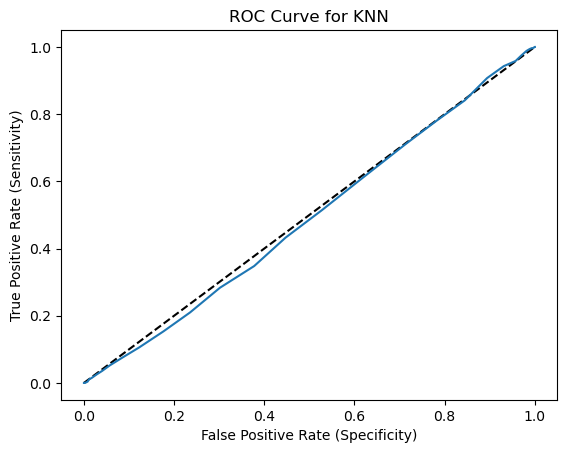

In [21]:
# ROC Curve
fpr, tpr, threshs = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title('ROC Curve for KNN')
plt.show()

In [22]:
# Confusion Matrix, made easier to read than what normally would be spat out.
conf_matrix = confusion_matrix(y_test, y_pred)
title_list = ["Actual False", "Actual True"]
conf_matrix_df = pd.DataFrame(conf_matrix, columns = ["Model Predicted False", "Model Predicted True"])
conf_matrix_df.insert(0," ", title_list)
conf_matrix_df["Model Predicted False"] = conf_matrix_df["Model Predicted False"].astype("int64")
conf_matrix_df["Model Predicted True"] = conf_matrix_df["Model Predicted True"].astype("int64")
print(conf_matrix_df)

                 Model Predicted False  Model Predicted True
0  Actual False                   1877                    22
1   Actual True                   1089                    12


In [23]:
# Sensitivity calculation
True_Neg = conf_matrix[0,0]
True_Pos = conf_matrix[1,1]
False_Neg = conf_matrix[1,0]
False_Pos = conf_matrix[0,1]
sensitivity = (True_Pos)/(True_Pos + False_Neg)
print("Sensitivity = " + str(sensitivity))

Sensitivity = 0.010899182561307902


In [24]:
# Specificity calculation
True_Neg = conf_matrix[0,0]
True_Pos = conf_matrix[1,1]
False_Neg = conf_matrix[1,0]
False_Pos = conf_matrix[0,1]
specificity = (True_Neg)/(True_Neg + False_Pos)
print("Specificity = " + str(specificity))

Specificity = 0.9884149552395998


## E2. Analysis Results

An AUC score of 0.49 indicates that the KNN model I have built is actually marginally worse than random classification. In particular, the model performed poorly at predicting true positives--it predicted almost none of them correctly. With an accuracy of 0.63, this model matches almost exactly the accuracy obtained from the logistic regression model I used previously. In addition, like the logistic regression model, the sensitivity is heinously low, though not 0, as was the case with the logistic regression model. This model made 12 correct positive class predictions, whereas the logistic regression model made none. In that respect, this model is a very *slight* improvement. However, both models are almost equally useless since both simply predicted false for almost every observation, and other prediction techniques should be considered going forward.

## E3. Analysis Limitations

The major limitation for the KNN analysis I performed is that I did not conduct any hyperparameter tuning and picked a k that, while not completely arbitrary, may have caused the model to suffer. Hyperparameter tuning can sometimes increase a model's performance by testing many models with different values of k. This process leads to the identification of the most optimal k-value to use. The gold standard for identifying such a k is RandomizedSearchCV, which uses cross-validation to avoid overfitting and randomly selecting k-values from a parameter grid you create to minimize the use of computational power. However, it is important to note that hyperparameter tuning generally only makes a big difference if the model started out using poor hyperparameters in the first place. Higher k-values tend to underfit the data, while lower k values can overfit the data. Thus, with my fairly high starting k-value of 84, it is possible that this k value caused the model to underfit the data, leading to poor performance.

## E4. Recommended Action

Since this model is effectively useless and offers almost no predictive power, I would recommend performing some hyperparameter tuning of k to try to optimize this KNN model's performance. If it still performs poorly even after hyperparameter tuning, I would then recommend that the analyst investigate other modeling techniques such as Naive Bayes that might handle the dataset better. Another course of action the analyst might take is to include more variables in the predictor variable dataset for the KNN model. It is possible that the problem is that the variables that predict readmission the best were simply left out, though the more variables are included, the higher the computational cost, especially if high-cardinality categorical variables need be included.

## F. Panopto

The link to the Panopto recording for this assignment can be found here: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0cf4dda4-c6e8-41eb-af6b-b121018075a2#

## G. Code Sources

GeeksforGeeks. (2023, November 30). How to add column from another DataFrame in Pandas.<br>
&emsp;&emsp;https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/

GfG. (2024, February 2). Convert a NumPy array into a CSV file. GeeksforGeeks. https://www.geeksforgeeks.org/convert-numpy-array-into-csv-file/

Nelson, M. (2023, August 8). *D206: Data Cleaning Performance Assessment.* Unpublished manuscript, Western Governors University.

## H. Content Sources

Band, A. (2023, December 12). How to find the optimal value of K in KNN? - Towards Data Science. Medium.<br>
&emsp;&emsp; https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

Categorical predictors: how many dummies to use in regression vs. k-nearest neighbors. (n.d.).<br>
&emsp;&emsp; https://www.bzst.com/2015/08/categorical-predictors-how-many-dummies.html

Grootendorst, M. (2021, December 29). 9 Distance measures in data science | Towards data science. Medium.<br>
&emsp;&emsp; https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

Maddali, S. (2022, December 20). What is data leakage, and how can it be avoided in machine learning? Medium.<br>
&emsp;&emsp; https://towardsdatascience.com/what-is-data-leakage-and-how-can-it-be-avoided-in-machine-learning-eb435a27c3e3

Raj, A. (2022, January 7). Introduction to classification using K nearest neighbours. Medium.<br>
&emsp;&emsp; https://towardsdatascience.com/getting-acquainted-with-k-nearest-neighbors-ba0a9ecf354f

Regis College. (2022, August 10). *How Reducing Hospital Readmissions Benefits Patients and Hospitals.*<br>
&emsp;&emsp;https://online.regiscollege.edu/blog/reducing-hospital-readmissions/